## diamond 데이터를 이용하여, 다이아몬드의 색깔이 가격에 차이를 주는 지를 유의 수준 5%에서 검정하시오.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/diamonds.csv', index_col=0)
data1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data1.groupby("color").agg({'price':['mean', 'std', 'min','max']})

price                         
              mean          std  min    max
color                                      
D      3169.954096  3356.590935  357  18693
E      3076.752475  3344.158685  326  18731
F      3724.886397  3784.992007  342  18791
G      3999.135671  4051.102846  354  18818
H      4486.669196  4215.944171  337  18803
I      5091.874954  4722.387604  334  18823
J      5323.818020  4438.187251  335  18710

Text(0.5, 1.0, 'Boxplot about the price grouped by color')

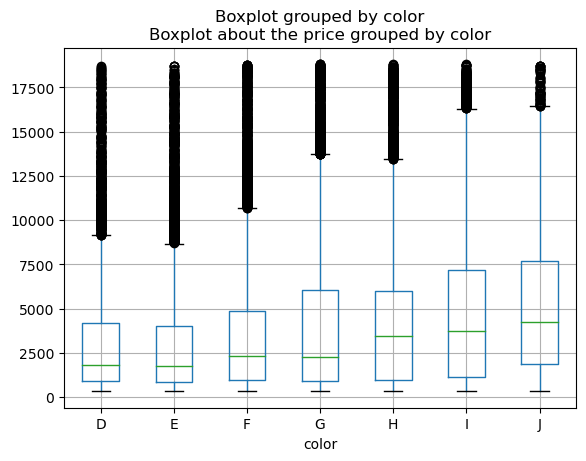

In [4]:
data1.boxplot("price", by="color")
plt.title("Boxplot about the price grouped by color")

In [5]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [7]:
price_fit = smf.ols("price~C(color,Sum)", data = data1).fit()
table1 = sm.stats.anova_lm(price_fit)
print(table1)

                    df        sum_sq       mean_sq           F  PR(>F)
C(color, Sum)      6.0  2.684911e+10  4.474852e+09  290.205881     0.0
Residual       53933.0  8.316240e+11  1.541958e+07         NaN     NaN


In [9]:
import statsmodels.stats.multicomp as mc
from scipy import stats

comp = mc.MultiComparison(data1['price'],data1['color'])
comptable,_,_ = comp.allpairtest(stats.ttest_ind, method = "bonf")
comptable

group1,group2,stat,pval,pval_corr,reject
D,E,1.7611,0.0782,1.0,False
D,F,-9.667,0.0,0.0,True
D,G,-14.1784,0.0,0.0,True
D,H,-20.8706,0.0,0.0,True
D,I,-26.228,0.0,0.0,True
D,J,-25.8928,0.0,0.0,True
E,F,-12.6279,0.0,0.0,True
E,G,-17.8657,0.0,0.0,True
E,H,-25.0774,0.0,0.0,True
E,I,-30.5925,0.0,0.0,True


## 대부분의 REJECT값이 TRUE인 것을 보아 대부분의 색깔 간에는 가격 차이가 존재한다.
## 하지만 D-E, I-J간에는 가격 차이가 거의 없다.